In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
#Supplemental imports
import holidays
import datetime as dt
from holidays import country_holidays
#Import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
#Settings
plt.rcParams['figure.figsize'] = (12,4)
pd.set_option('display.max_columns',50)

In [2]:
import glob
q = "Data/Chicago/*.csv"
chunked_files = sorted(glob.glob(q))
# Show up to first 30 files
chunked_files[:30]

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [3]:
# Loading all files
df_list = []
for file in chunked_files:
    temp_df = pd.read_csv(file, index_col=0, lineterminator='\n')
    df_list.append(temp_df)
    
# concat
df = pd.concat(df_list)
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude\r
ID,,,,,,,,,,,
6154338,01/01/2001 01:00:00 PM,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896431\r
1313213,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,VEHICLE NON-COMMERCIAL,False,True,731,7.0,NaN,41.765396,-87.626697771\r
1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929135\r
1311626,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704086603\r
1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716715611\r


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7899126 entries, 6154338 to 13217098
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
            object 
dtypes: bool(2), float64(3), int64(1), object(5)
memory usage: 617.7+ MB


In [5]:
# drop duplicates
df = df.drop_duplicates()



In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
#Set format
fmt = "%m/%d/%Y %I:%M:%S %p"

In [8]:
#Convert date to datetime data type
df['Date'] = pd.to_datetime(df['Date'], format = fmt)
#Verify the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7879328 entries, 6154338 to 13217098
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  datetime64[ns]
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Ward                  float64       
 9   Latitude              float64       
            object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 616.2+ MB


In [9]:
#Set date column as index
df = df.set_index('Date')
df.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude\r
Date,,,,,,,,,,
2001-01-01 13:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896431\r
2001-01-01 01:00:00,BATTERY,SIMPLE,VEHICLE NON-COMMERCIAL,False,True,731,7.0,NaN,41.765396,-87.626697771\r
2001-01-01 01:00:00,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929135\r
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704086603\r
2001-01-01 13:00:00,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716715611\r


In [10]:
#Confirm index
df.index

DatetimeIndex(['2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 13:00:00',
               ...
               '2023-09-20 00:00:00', '2023-09-20 00:00:00',
               '2023-09-20 00:00:00', '2023-09-20 00:00:00',
               '2023-09-20 00:00:00', '2023-09-20 00:00:00',
               '2023-09-20 00:00:00', '2023-09-20 00:00:00',
               '2023-09-20 00:00:00', '2023-09-20 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=7879328, freq=None)

In [11]:
#Feature engineering year and month columns
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Month Name'] = df.index.month_name()
df.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude\r,Year,Month,Month Name
Date,,,,,,,,,,,,,
2001-01-01 13:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,831,8.0,15.0,41.774819,-87.702896431\r,2001,1,January
2001-01-01 01:00:00,BATTERY,SIMPLE,VEHICLE NON-COMMERCIAL,False,True,731,7.0,NaN,41.765396,-87.626697771\r,2001,1,January
2001-01-01 01:00:00,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929135\r,2001,1,January
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,10.0,NaN,41.848786,-87.704086603\r,2001,1,January
2001-01-01 13:00:00,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716715611\r,2001,1,January


## Topic 1) Comparing Police Districts:

    - Which district has the most crimes? Which has the least?

In [12]:
crime_counts_by_district = df.groupby('District')['Primary Type'].value_counts().sort_index()
# Convert the result to a DataFrame and reset the index
df_crime_counts_by_district = crime_counts_by_district.reset_index()
df_crime_counts_by_district.rename(columns={'Primary Type': 'Crime Type', 'Primary Type': 'Crime Type', 'Primary Type': 'Crime Type'}, inplace=True)

# Display the resulting DataFrame
df_crime_counts_by_district

,District,Crime Type,count
0,1.0,ARSON,126
1,1.0,ASSAULT,15163
2,1.0,BATTERY,33971
3,1.0,BURGLARY,5323
4,1.0,CONCEALED CARRY LICENSE VIOLATION,22
...,...,...,...
750,31.0,PUBLIC PEACE VIOLATION,1
751,31.0,ROBBERY,2
752,31.0,SEX OFFENSE,4
753,31.0,STALKING,1


In [13]:
# Aggregate crimes by district and sum the counts
crime_counts_by_district = df_crime_counts_by_district.groupby('District').agg({'count': 'sum'}).reset_index()

# Display the resulting DataFrame
crime_counts_by_district

,District,count
0,1.0,319638
1,2.0,373327
2,3.0,399724
3,4.0,447548
4,5.0,348978
5,6.0,461174
6,7.0,454136
7,8.0,529359
8,9.0,384715
9,10.0,339457


In [14]:
df['District'].value_counts()

District
8.0     529359
11.0    502466
6.0     461174
7.0     454136
25.0    448029
4.0     447548
3.0     399724
12.0    391713
9.0     384715
2.0     373327
19.0    354954
18.0    354432
5.0     348978
10.0    339457
15.0    336121
1.0     319638
14.0    304759
16.0    264073
22.0    258333
24.0    238813
17.0    227494
20.0    139787
31.0       247
21.0         4
Name: count, dtype: int64

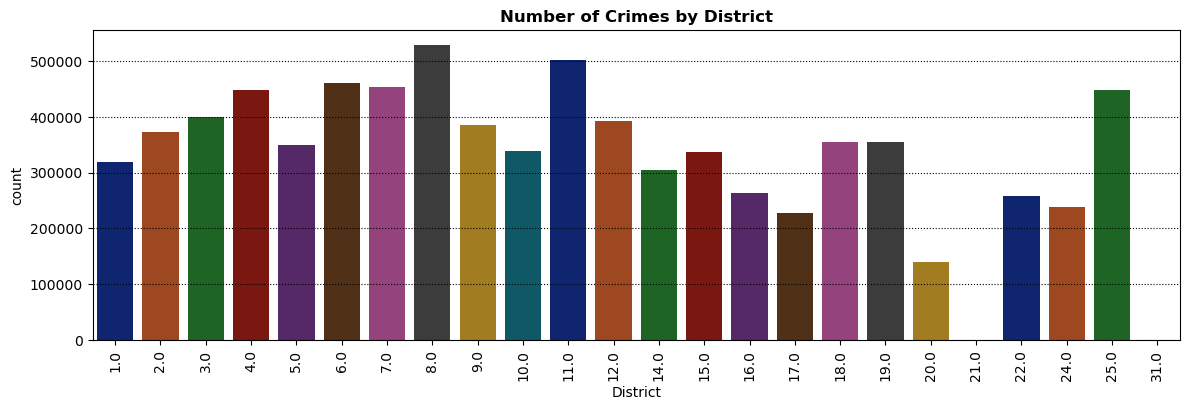

In [15]:
# visualize crimes by district no.
ax = sns.countplot(data=df, x='District',palette='dark');
plt.xticks(rotation=90);
plt.grid(which= 'major',axis= 'y',color= 'k', ls=':')
plt.tight_layout()
plt.title('Number of Crimes by District', fontweight = 'bold');
plt.savefig('crimesByDistrict.jpeg', dpi=300);

- District 8.0 has the most number of crimes.
- District 21.0 has the least number of crimes.



## Q2: What months have the most crime? What months have the least?


In [17]:
# Group crime types by month name and count the occurrences
crime_counts_by_month = df.groupby('Primary Type')['Month'].value_counts().sort_index()

# Display the resulting DataFrame
crime_counts_by_month


Primary Type       Month
ARSON              1          963
                   2          841
                   3         1140
                   4         1134
                   5         1284
                            ...  
WEAPONS VIOLATION  8        10677
                   9         9881
                   10        9182
                   11        7945
                   12        7399
Name: count, Length: 415, dtype: int64

In [19]:
plot_df = crime_counts_by_month.to_frame('# of Crimes').reset_index()
plot_df


,Primary Type,Month,# of Crimes
0,ARSON,1,963
1,ARSON,2,841
2,ARSON,3,1140
3,ARSON,4,1134
4,ARSON,5,1284
...,...,...,...
410,WEAPONS VIOLATION,8,10677
411,WEAPONS VIOLATION,9,9881
412,WEAPONS VIOLATION,10,9182
413,WEAPONS VIOLATION,11,7945


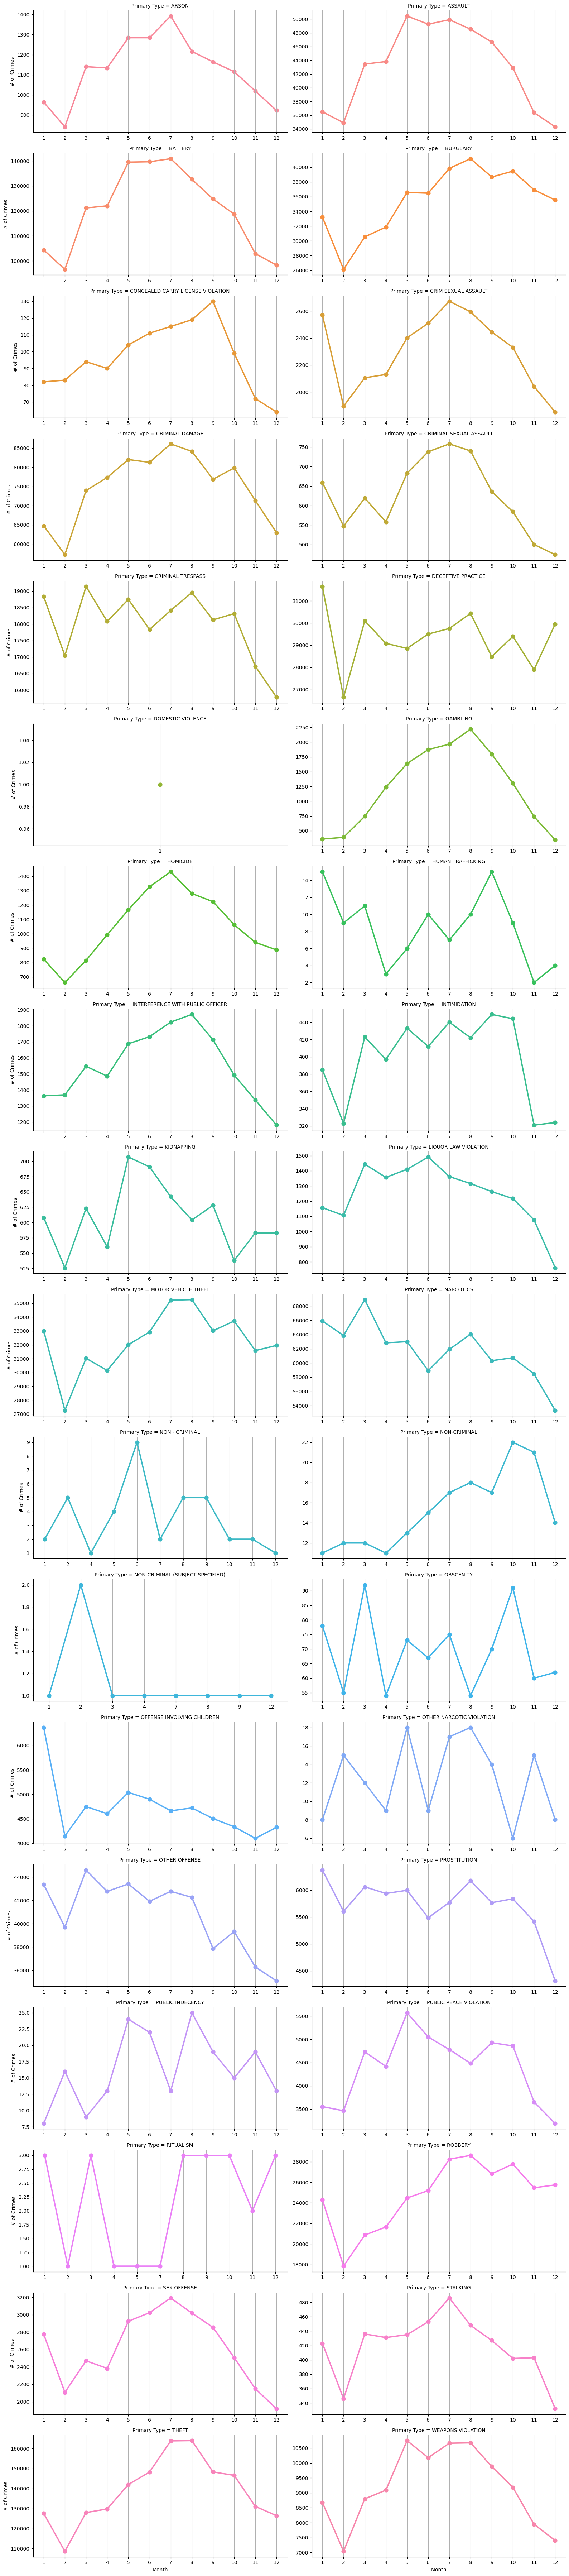

In [21]:
#Plot data
g = sns.catplot(data=plot_df, x='Month', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

In [23]:
# find the values
df['Month'].value_counts()

Month
7     739197
8     732064
5     703469
6     702624
9     679877
10    674212
3     648672
4     646339
1     620715
11    607415
12    578403
2     546341
Name: count, dtype: int64

- July has the most crime
- February has the least crime

Topic 2) Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?

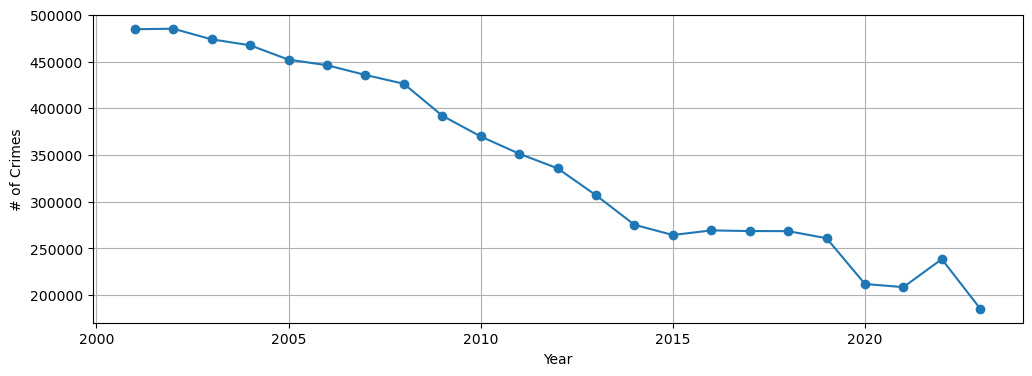

In [24]:
#year counts
year = df['Year'].value_counts().sort_index()
year.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year');

In [25]:
# crime type with year
year_count = df.groupby('Primary Type')['Year'].value_counts().sort_index()
year_count

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2019    6336
                   2020    8427
                   2021    8979
                   2022    8770
                   2023    6445
Name: count, Length: 720, dtype: int64

- The graph shows that the is decreasing acroos the years

In [27]:
#Convert to df
plot_df = year_count.to_frame('# of Crimes').reset_index()
plot_df

,Primary Type,Year,# of Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
715,WEAPONS VIOLATION,2019,6336
716,WEAPONS VIOLATION,2020,8427
717,WEAPONS VIOLATION,2021,8979
718,WEAPONS VIOLATION,2022,8770


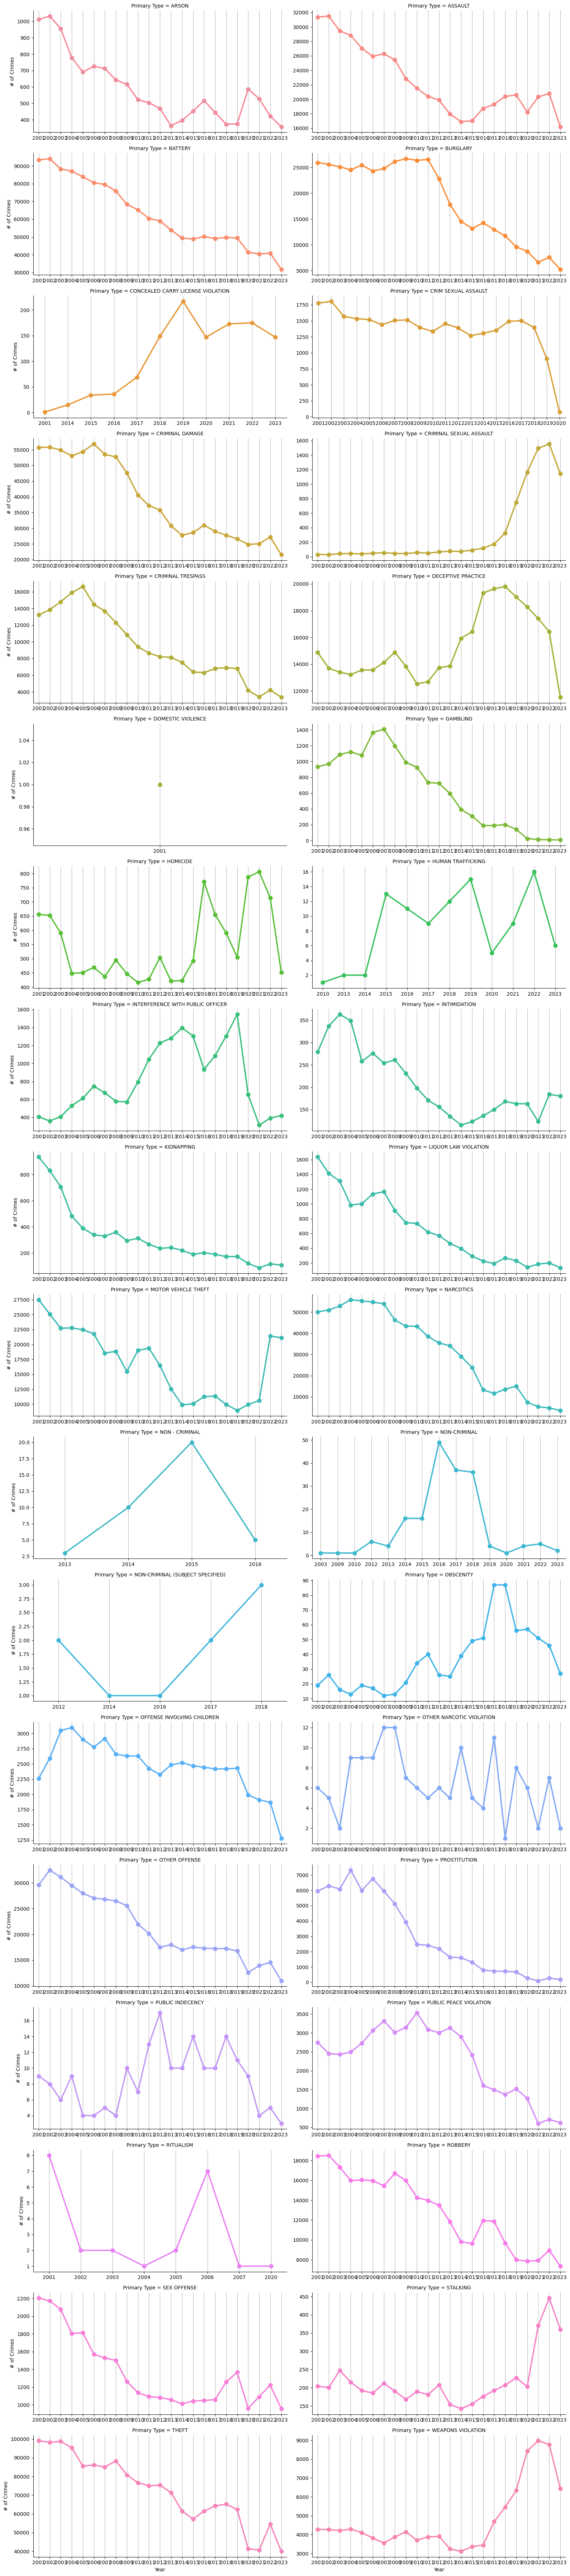

In [28]:
#Plot data
g = sns.catplot(data=plot_df, x='Year', y='# of Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

-Several types of crimes exhibit a consistent decline in frequency in line with the overall yearly distribution pattern. However, a subset of crimes, including concealed carry license violations, criminal sexual assault, deceptive practices, homicides, human trafficking, interference with a public officer, recent motor vehicle theft, non-criminal offenses, obscenity, public indecency, stalking, and weapons violations, do not conform to this declining trend.